### DETECTRON

In [2]:
!pip install pyyaml==5.1
# Версия torch 1.9.0
!pip install torch==1.9.0+cu102 torchvision==0.10.0+cu102 -f https://download.pytorch.org/whl/torch_stable.html

!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html
##### ПЕРЕЗАПУСТИТЕ СРЕДУ ####

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 5.0 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp38-cp38-linux_x86_64.whl size=44089 sha256=6ac3ff3c91bfcfa05e17f8d840f099b263df49bbe7f0bf8502e0fcbbf9e09de3
  Stored in directory: /root/.cache/pip/wheels/52/dd/2b/10ff8b0ac81b93946bb5fb9e6749bae2dac246506c8774e6cf
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/w

In [5]:
# Устанавливаем логгер для детектрона
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Импортируем библиотеки
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer

In [6]:
# Проверка версий
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.9") 

1.9.0+cu102 True


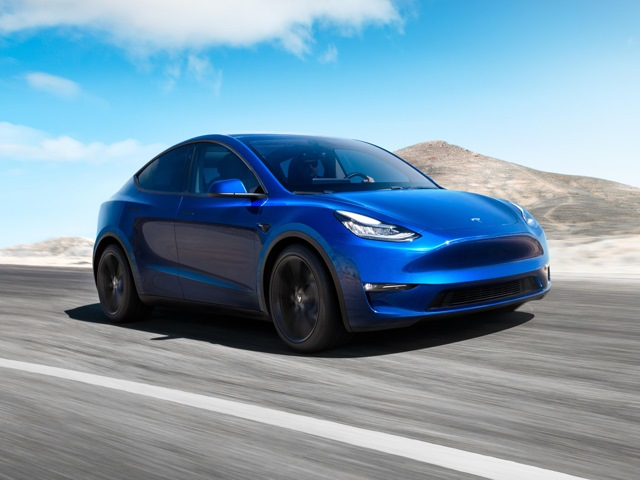

In [7]:
! wget https://img-c.drive.ru/models.photos/0000/000/000/001/966/48d87b714a8833e3-large.jpg -q -O ./model_y.jpg
img = cv2.imread('./model_y.jpg')
cv2_imshow(img)

### Загрузим модель R-CNN name: R50-FPN

In [8]:
cfg = get_cfg()

#cfg.MODEL.DEVICE='cpu'

yaml_path = 'COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml'

cfg.merge_from_file(model_zoo.get_config_file(yaml_path))

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(yaml_path)

predictor = DefaultPredictor(cfg)

outputs = predictor(img)

model_final_280758.pkl: 167MB [00:05, 30.8MB/s]                           
/usr/local/lib/python3.8/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, paddin

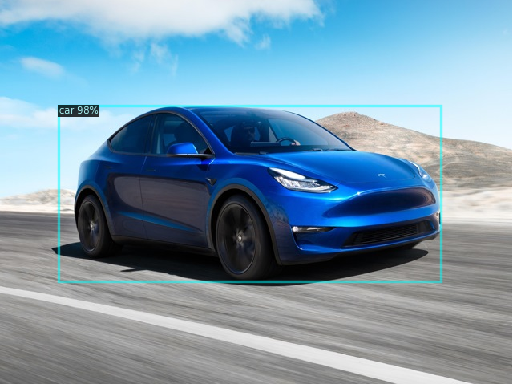

In [9]:
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [10]:
# Upload Tesla dataset 

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Vqep7VvWr89oSY41MJnl")
project = rf.workspace("home-ujoxg").project("tesla-e4rxc")
dataset = project.version(2).download("coco")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 815 kB/s 
     |████████████████████████████████| 145 kB 8.2 MB/s 
     |████████████████████████████████| 701 kB 46.4 MB/s 
     |████████████████████████████████| 67 kB 7.0 MB/s 
     |████████████████████████████████| 138 kB 81.7 MB/s 
     |████████████████████████████████| 54 kB 3.7 MB/s 
     |████████████████████████████████| 178 kB 71.6 MB/s 
     |████████████████████████████████| 62 kB 1.9 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=6ca2830768ed5ce28b5d2f4e8c99d249dd5bf61f6e3fc9d46fa851b7e2721792
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting 

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Tesla-2 in coco:: 100%|██████████| 2569/2569 [00:01<00:00, 2077.95it/s]


In [11]:
for i in os.listdir('Tesla-2/train'):
  if 'json' in i:
    print(i)

_annotations.coco.json


In [12]:
from detectron2.data.datasets import register_coco_instances

register_coco_instances("Tesla2_train", {}, 
                        "Tesla-2/train/_annotations.coco.json", 
                        "Tesla-2/train/")

register_coco_instances("Tesla2_test", {}, 
                        "Tesla-2/test/_annotations.coco.json", 
                        "Tesla-2/test/")

register_coco_instances("Tesla2_valid", {}, 
                        "Tesla-2/valid/_annotations.coco.json", 
                        "Tesla-2/valid/")


## Сохранение данных для работы сети
tesla_metadata = MetadataCatalog.get("Tesla2_train")
tesla_dicts = DatasetCatalog.get("Tesla2_train")

tesla_metadata_valid = MetadataCatalog.get("Tesla2_valid")
tesla_dicts_valid = DatasetCatalog.get("Tesla2_valid")

WARNING [12/09 07:46:46 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/09 07:46:46 d2.data.datasets.coco]: Loaded 2241 images in COCO format from Tesla-2/train/_annotations.coco.json
WARNING [12/09 07:46:46 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/09 07:46:46 d2.data.datasets.coco]: Loaded 213 images in COCO format from Tesla-2/valid/_annotations.coco.json


In [13]:
# ПАРАМЕТРЫ ОБУЧЕНИЯ
cfg = get_cfg() 
cfg.merge_from_file(model_zoo.get_config_file(yaml_path))
cfg.DATASETS.TRAIN = ("Tesla2_train")
cfg.DATASETS.TEST = ("Tesla2_valid",)


cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(yaml_path)  
#cfg.MODEL.WEIGHTS = '/content/output/model_final.pth' 
cfg.SOLVER.IMS_PER_BATCH = 16
cfg.SOLVER.BASE_LR = 0.001  
cfg.SOLVER.MAX_ITER = 3000   
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64   # batch_size
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6  # число классов
# Запускаем обучение

## Проверяем, существует ли папка для сохранения обученной модели
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

## Создаем объект "тренировщика" 
trainer = DefaultTrainer(cfg) 

## Запускаем обучение заново -≥ resume=False
trainer.resume_or_load(resume=False)

## Запускаем обучение
trainer.train()

[12/09 07:46:47 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[12/09 07:46:58 d2.engine.train_loop]: Starting training from iteration 0


This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


[12/09 07:47:50 d2.utils.events]:  eta: 2:07:03  iter: 19  total_loss: 2.743  loss_cls: 2.028  loss_box_reg: 0.7128  loss_rpn_cls: 0.007529  loss_rpn_loc: 0.00835  time: 2.5717  data_time: 0.1841  lr: 1.9981e-05  max_mem: 11281M
[12/09 07:48:40 d2.utils.events]:  eta: 2:05:30  iter: 39  total_loss: 2.278  loss_cls: 1.597  loss_box_reg: 0.7008  loss_rpn_cls: 0.006914  loss_rpn_loc: 0.007323  time: 2.5415  data_time: 0.1597  lr: 3.9961e-05  max_mem: 11281M
[12/09 07:49:32 d2.utils.events]:  eta: 2:04:56  iter: 59  total_loss: 1.587  loss_cls: 0.9021  loss_box_reg: 0.6912  loss_rpn_cls: 0.005706  loss_rpn_loc: 0.007516  time: 2.5601  data_time: 0.1849  lr: 5.9941e-05  max_mem: 11281M
[12/09 07:50:23 d2.utils.events]:  eta: 2:04:23  iter: 79  total_loss: 1.293  loss_cls: 0.5933  loss_box_reg: 0.6848  loss_rpn_cls: 0.004105  loss_rpn_loc: 0.008675  time: 2.5606  data_time: 0.1622  lr: 7.9921e-05  max_mem: 11281M
[12/09 07:51:13 d2.utils.events]:  eta: 2:03:18  iter: 99  total_loss: 1.212  l

In [16]:
# Подгружаем обученную модель
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # путь к обученной модели
# устанавливаем порог обнаружения
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.95  

# создаем объект для построения предсказаний
predictor = DefaultPredictor(cfg)

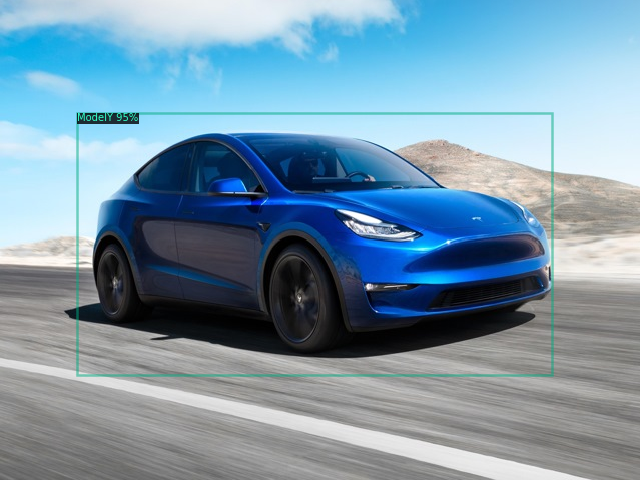

In [18]:
img = cv2.imread('model_y.jpg')
outputs = predictor(img)
v = Visualizer(img[:, :, ::-1],
                   metadata=tesla_metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
torch.save(model.state_dict(), 'denoising-dirty-documents.pt')